In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
from functools import partial
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from scipy.stats import norm

C:\Users\LG\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def l21_norm(W):
    # Computes the L21 norm of a symbolic matrix W
    return tf.reduce_sum(tf.norm(W, axis=1))

def group_regularization(v):
    # Computes a group regularization loss from a list of weight matrices corresponding
    # to the different layers
    const_coeff = lambda W: tf.sqrt(tf.cast(W.get_shape().as_list()[1], tf.float32))
    return tf.reduce_sum([tf.multiply(const_coeff(W), l21_norm(W)) for W in v if 'bias' not in W.name])

def group_regularization_player(v):
	const_coeff = lambda W: tf.sqrt(tf.cast(W.get_shape().as_list()[1], tf.float32))
	return tf.reduce_sum(tf.multiply(const_coeff(v), l21_norm(v)))

def custom_group_regularization_player(v, g_scalevec):
	#const_coeff = lambda W: tf.sqrt(tf.cast(W.get_shape().as_list()[1], tf.float32))
	return tf.reduce_sum(tf.multiply(tf.norm(v, axis=1), g_scalevec))

def friedman_suite(x):
	return 10 * np.sin(np.pi * x[0] * x[1]) + 20 * (x[2] - 0.5)**2 + 10 * x[3] + 5 * x[4]

def get_grd_importance(iXtest):
	nsamples = iXtest.shape[0]
	isum = 0.0
	for i in range(nsamples):
		isum = isum + friedman_suite(iXtest[i, :])
	isum = isum * 1.0 / nsamples
	return isum

def f11_suite(x):
    interaction1 = 10 * np.exp(x[:, 0]*x[:, 1])
    interaction4 = 2 * np.arcsin(x[:, 8] * x[:, 9])
    y=interaction1 + interaction4
    return y

def get_grd_importance_f(iXtest):
	isum = f11_suite(iXtest)
	return np.mean(isum)

def get_grd_importance_f4(iXtest):
	isum = f4_suite(iXtest)
	return np.mean(isum)

In [3]:
n_variables = 11
samples_per_var = 20000


np.random.seed(31)
tf.set_random_seed(0)

In [4]:
dataset_name = './wine_red'
split =	19
train_dataset_name = dataset_name + '_training' + str(split)+'.csv'
test_dataset_name = dataset_name + '_testing' + str(split)+'.csv'

trainingData = pd.DataFrame(pd.read_csv(train_dataset_name))
testingData = pd.DataFrame(pd.read_csv(test_dataset_name))

X_train = trainingData.iloc[:, 1:-1].values
y_train = trainingData.iloc[:, -1].values.flatten()
X_test = testingData.iloc[:, 1:-1].values
y_test = testingData.iloc[:, -1].values.flatten()

In [13]:
X_train.shape

(1439, 11)

In [14]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
n_inputs = 11
n_hidden1 = 4
n_hidden2 = 3
n_hidden3 = 2
n_hidden4 = 5
n_hidden5 = 2
n_hidden6 = 5
n_hidden7 = 3
n_hidden8 = 5
n_hidden9 = 7
n_hidden10 = 5
n_hidden11 = 7
n_hidden22 = 8
n_hidden33 = 8
n_hidden44 = 6
n_hidden55 = 9
n_hidden66 = 7
n_hidden77 = 5
n_hidden88 = 10
n_hidden99 = 12
n_hidden1010 = 13
n_outputs = 1
g_scale = 1
thresh = 0.5
dropout_rate = 0.2
n_hiddens = n_hidden1 + n_hidden2 + n_hidden3 + n_hidden4 + n_hidden5 + n_hidden6 + n_hidden7 + n_hidden8 + n_hidden9 + n_hidden10
elems_scale = [0.1] * n_hiddens
#elems_scale[0] = 0.0001, not very useful
#elems_scale[1] = 0.0001, not very useful
#g_scalevec = tf.constant([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
g_scalevec = tf.constant(elems_scale)
training = tf.placeholder_with_default(False, shape=(), name='training')
X = tf.placeholder(tf.float32, (None, n_inputs), name='X')
y = tf.placeholder(tf.float32, (None), name = 'y')

In [16]:
X

<tf.Tensor 'y:0' shape=<unknown> dtype=float32>

In [17]:
with tf.name_scope('dnn'):
	hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name='hidden1')
	hidden2 = tf.layers.dense(X, n_hidden2, activation=tf.nn.relu, name='hidden2')
	hidden3 = tf.layers.dense(X, n_hidden3, activation=tf.nn.relu, name='hidden3')
	hidden4 = tf.layers.dense(X, n_hidden4, activation=tf.nn.relu, name='hidden4')
	hidden5 = tf.layers.dense(X, n_hidden5, activation=tf.nn.relu, name='hidden5')
	hidden6 = tf.layers.dense(X, n_hidden6, activation=tf.nn.relu, name='hidden6')
	hidden7 = tf.layers.dense(X, n_hidden7, activation=tf.nn.relu, name='hidden7')
	hidden8 = tf.layers.dense(X, n_hidden8, activation=tf.nn.relu, name='hidden8')
	hidden9 = tf.layers.dense(X, n_hidden9, activation=tf.nn.relu, name='hidden9')
	hidden10 = tf.layers.dense(X, n_hidden10, activation=tf.nn.relu, name='hidden10')
	hidden1_1 = tf.layers.dense(hidden1, n_hidden11, activation=tf.nn.relu, name='hidden1_1')
	hidden1_1drop = tf.layers.dropout(hidden1_1, dropout_rate, training=training)
	hidden1_2 = tf.layers.dense(hidden2, n_hidden22, activation=tf.nn.relu, name='hidden1_2')
	hidden1_2drop = tf.layers.dropout(hidden1_2, dropout_rate, training=training)
	hidden1_3 = tf.layers.dense(hidden3, n_hidden33, activation=tf.nn.relu, name='hidden1_3')
	hidden1_3drop = tf.layers.dropout(hidden1_3, dropout_rate, training=training)
	hidden1_4 = tf.layers.dense(hidden4, n_hidden44, activation=tf.nn.relu, name='hidden1_4')
	hidden1_4drop = tf.layers.dropout(hidden1_4, dropout_rate, training=training)
	hidden1_5 = tf.layers.dense(hidden5, n_hidden55, activation=tf.nn.relu, name='hidden1_5')
	hidden1_5drop = tf.layers.dropout(hidden1_5, dropout_rate, training=training)
	hidden1_6 = tf.layers.dense(hidden6, n_hidden66, activation=tf.nn.relu, name='hidden1_6')
	hidden1_6drop = tf.layers.dropout(hidden1_6, dropout_rate, training=training)
	hidden1_7 = tf.layers.dense(hidden7, n_hidden77, activation=tf.nn.relu, name='hidden1_7')
	hidden1_7drop = tf.layers.dropout(hidden1_7, dropout_rate, training=training)
	hidden1_8 = tf.layers.dense(hidden8, n_hidden88, activation=tf.nn.relu, name='hidden1_8')
	hidden1_8drop = tf.layers.dropout(hidden1_8, dropout_rate, training=training)
	hidden1_9 = tf.layers.dense(hidden9, n_hidden99, activation=tf.nn.relu, name='hidden1_9')
	hidden1_9drop = tf.layers.dropout(hidden1_9, dropout_rate, training=training)
	hidden1_10 = tf.layers.dense(hidden10, n_hidden1010, activation=tf.nn.relu, name='hidden1_10')
	hidden1_10drop = tf.layers.dropout(hidden1_10, dropout_rate, training=training)
	hidden_cat = tf.concat([hidden1_1drop, hidden1_2drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_3drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_4drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_5drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_6drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_7drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_8drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_9drop], 1)
	hidden_cat = tf.concat([hidden_cat, hidden1_10drop], 1)
	hidden_cat_drop = tf.layers.dropout(hidden_cat, dropout_rate, training=training)
	logits = tf.layers.dense(hidden_cat_drop, n_outputs, name='outputs')
	simu = tf.reduce_mean(logits)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
logits

<tf.Tensor 'dnn/outputs/BiasAdd:0' shape=(?, 1) dtype=float32>

In [18]:
W_h1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
W_h2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")
W_h3 = tf.get_default_graph().get_tensor_by_name("hidden3/kernel:0")
W_h4 = tf.get_default_graph().get_tensor_by_name("hidden4/kernel:0")
W_h5 = tf.get_default_graph().get_tensor_by_name("hidden5/kernel:0")
W_h6 = tf.get_default_graph().get_tensor_by_name("hidden6/kernel:0")
W_h7 = tf.get_default_graph().get_tensor_by_name("hidden7/kernel:0")
W_h8 = tf.get_default_graph().get_tensor_by_name("hidden8/kernel:0")
W_h9 = tf.get_default_graph().get_tensor_by_name("hidden9/kernel:0")
W_h10 = tf.get_default_graph().get_tensor_by_name("hidden10/kernel:0")
W_cat = tf.concat([W_h1, W_h2], 1)
W_cat = tf.concat([W_cat, W_h3], 1)
W_cat = tf.concat([W_cat, W_h4], 1)
W_cat = tf.concat([W_cat, W_h5], 1)
W_cat = tf.concat([W_cat, W_h6], 1)
W_cat = tf.concat([W_cat, W_h7], 1)
W_cat = tf.concat([W_cat, W_h8], 1)
W_cat = tf.concat([W_cat, W_h9], 1)
W_cat = tf.concat([W_cat, W_h10], 1)
W_rcat = tf.transpose(W_cat)

In [19]:
W_rcat

<tf.Tensor 'transpose:0' shape=(41, 11) dtype=float32>

In [23]:
with tf.name_scope('loss'):
	base_loss = tf.reduce_mean(tf.squared_difference(y, tf.transpose(logits)))
	reg_losses = custom_group_regularization_player(W_rcat, g_scalevec)
	loss = tf.add(base_loss, reg_losses, name="loss")
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon=1e-08
n_epochs = 200
train_samples_size = X_train.shape[0]
test_samples_size = X_test.shape[0]
batch_size = 100 
batch = tf.Variable(0)
decaying_learning_rate = tf.train.exponential_decay(learning_rate, batch*batch_size, train_samples_size, 0.95, staircase=True)
with tf.name_scope('train'):
	optimizer = tf.train.AdamOptimizer(learning_rate = decaying_learning_rate, beta1 = beta1, beta2 = beta2, epsilon = epsilon)
	training_op = optimizer.minimize(loss)
with tf.name_scope('eval'):
	accuracy = tf.losses.mean_squared_error(y, tf.transpose(logits))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [41]:
loss.shape

TensorShape([])

0 train error: 2.2577083 test error: 2.372363
50 train error: 0.7126813 test error: 0.65423626
100 train error: 0.6036416 test error: 0.6709106
150 train error: 0.69783366 test error: 0.6765407
199 train error: 0.6424564 test error: 0.674472


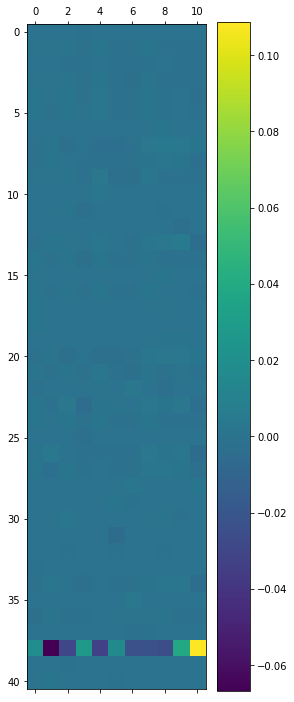

[[-1.21373276e-08 -2.57182728e-05  1.95010762e-05 -1.37291756e-03
  -1.16667440e-11  4.56794851e-08 -1.46714074e-05  3.34408032e-05
  -2.84447188e-11  1.12169073e-05  7.99408042e-08]
 [ 1.04878377e-03  1.10994384e-04  6.86036074e-04 -8.76592821e-04
   1.42756384e-03 -9.13370633e-04 -1.52865890e-03  1.19873532e-03
  -9.30454698e-04 -6.06777961e-04 -1.59843313e-03]
 [-1.36945979e-04  1.66848069e-04 -3.08139424e-04 -5.17458073e-04
  -1.49748375e-04 -5.03017858e-04 -4.93727915e-04 -2.99516687e-04
  -1.08219829e-04 -5.15881577e-04 -4.84300777e-04]
 [ 8.86759954e-04 -1.75352252e-04  9.30115813e-04 -9.00033396e-04
   1.46992563e-03 -6.71603426e-04 -1.68273237e-03  8.90144729e-04
  -7.70169776e-04 -3.53497569e-04 -1.52114010e-03]
 [ 1.16712134e-03 -3.94595845e-05  1.16510561e-03 -8.63563968e-04
   2.02813651e-03 -1.13141816e-03 -1.36899226e-03  1.53559633e-03
  -7.77133508e-04 -1.22498954e-04 -1.67914596e-03]
 [ 1.22164038e-03 -6.39617152e-04  1.17232930e-03 -2.01716670e-04
   2.21333187e-03 -

In [24]:
with tf.Session() as sess:
	init.run()
	for epoch in range(n_epochs):
		for i in range(train_samples_size//batch_size):
			batch_index = np.random.choice(train_samples_size, batch_size, replace=False)
			X_batch = X_train[batch_index, :]
			y_batch = y_train[batch_index]
			sess.run([training_op,decaying_learning_rate],feed_dict={X:X_batch, y:y_batch})
		if epoch % 50 == 0:
			acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
			acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
			print (epoch, 'train error:', np.sqrt(acc_train), 'test error:', np.sqrt(acc_test))
	
	#save_path = saver.save(sess, './my_f7_model_final.ckpt')
	acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
	acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
	print (epoch, 'train error:', np.sqrt(acc_train), 'test error:', np.sqrt(acc_test))
	
	W_mat = W_rcat.eval()
	plt.matshow(W_mat)
	plt.colorbar()
	plt.show()
	print (W_mat)